<a href="https://colab.research.google.com/github/coder-jkb/ML-projects/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jay Bhanushali
## Analysis & Prediction on Attrition dataset 

## **Index**
1. Required Libraries
2. Importing datasets
3. Statistical overview of data
4. Some visualizations
5. Pre-processing (Label Encoding)
6. Dropping unnecessary features
7. Train Test Split
8. Making the model
9. Summary of all the models

## **1. Required Libraries**

In [ ]:
# libraries to handle DataFrame and Numpy Array
import numpy as np
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing & others
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Models: 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

## **2. Importing dataset**

In [ ]:
# importing directly from drive link
url = "https://drive.google.com/file/d/1411Dl3FmdBcVrEg_T1x0FRSQ1T9JVFUv/view?usp=sharing"
url = "https://drive.google.com/uc?id=" + url.split('/')[-2]

data = pd.read_csv(url)

# data = pd.read_csv("Employee-turnover.csv")
data.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [ ]:
# checking for duplicates
print("Duplicate values = ",data.duplicated().sum() )

Duplicate values =  0


In [ ]:
pd.value_counts(data["Employee Count"])

1    1470
Name: Employee Count, dtype: int64

In [ ]:
data.drop("Employee Count", axis=1, inplace=True)
data.drop("Employee ID", axis=1, inplace=True)

We dropped the column ```Employee Count``` because it only has value *1* 

```Employee Id``` and ```Employee Count``` are of no significanse 

From above info we can see that
- the dataset has 28 columns and 1470 rows
- no null values, no duplicate values

In [ ]:
data.head(10)

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,No
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,No
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,No
5,Research & Development,Laboratory Technician,Male,32,Single,College,Life Sciences,Travel_Frequently,2,High,...,8,7,7,3,6,Very High,2,Good,High,No
6,Research & Development,Laboratory Technician,Female,59,Married,Bachelor,Medical,Travel_Rarely,3,Very High,...,12,1,0,0,0,High,3,Good,Low,No
7,Research & Development,Laboratory Technician,Male,30,Divorced,Below College,Life Sciences,Travel_Rarely,24,High,...,1,1,0,0,0,Very High,2,Better,Medium,No
8,Research & Development,Manufacturing Director,Male,38,Single,Bachelor,Life Sciences,Travel_Frequently,23,Medium,...,10,9,7,1,8,Very High,2,Better,Medium,No
9,Research & Development,Healthcare Representative,Male,36,Married,Bachelor,Medical,Travel_Rarely,27,High,...,17,7,7,7,7,High,3,Good,Medium,No


In [ ]:
# label encoding Attrition column
le = LabelEncoder()
data["Attrition (Yes/No)"] = le.fit_transform(data["Attrition (Yes/No)"])

In [ ]:
data.head(10)

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,0
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,0
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,0
5,Research & Development,Laboratory Technician,Male,32,Single,College,Life Sciences,Travel_Frequently,2,High,...,8,7,7,3,6,Very High,2,Good,High,0
6,Research & Development,Laboratory Technician,Female,59,Married,Bachelor,Medical,Travel_Rarely,3,Very High,...,12,1,0,0,0,High,3,Good,Low,0
7,Research & Development,Laboratory Technician,Male,30,Divorced,Below College,Life Sciences,Travel_Rarely,24,High,...,1,1,0,0,0,Very High,2,Better,Medium,0
8,Research & Development,Manufacturing Director,Male,38,Single,Bachelor,Life Sciences,Travel_Frequently,23,Medium,...,10,9,7,1,8,Very High,2,Better,Medium,0
9,Research & Development,Healthcare Representative,Male,36,Married,Bachelor,Medical,Travel_Rarely,27,High,...,17,7,7,7,7,High,3,Good,Medium,0


## **3. Statistical overview of data**

In [ ]:
data.describe()

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Attrition (Yes/No)
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320,0.161224
std,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271,0.367863
min,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000,1.000000


## **4. Some visualizations**

([<matplotlib.patches.Wedge at 0x2ae77013790>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '83.9%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.1%')])

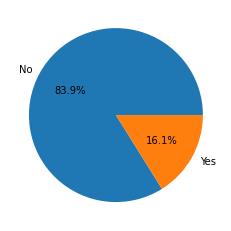

In [ ]:
plt.pie(data["Attrition (Yes/No)"].value_counts(), 
        labels = ['No', 'Yes'], autopct='%1.1f%%')

In the given dataset only **16%** people are not attrited, 

which depicts the imbalance in dataset, 

hence Ensemble models (like Random Forest) can learn better in this scenario

In [ ]:
data["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

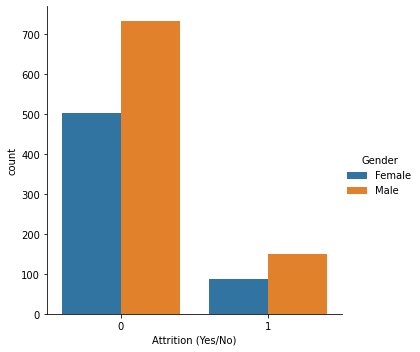

In [ ]:
sns.catplot(data=data,x="Attrition (Yes/No)",hue="Gender",kind="count")

We can see a higher Attrition in Males, this could be because the cont of males is higher than females.
<table>
<tr><td>Males</td><td>Females</td></tr>
<tr><td>882</td><td>588</td></tr>
</table>
Male:Female ratio is 3:2

<AxesSubplot:xlabel='Department', ylabel='Attrition (Yes/No)'>

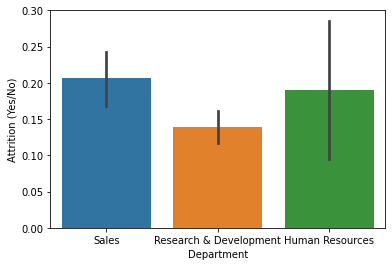

In [ ]:
sns.barplot(data=data,x="Department",y="Attrition (Yes/No)")

Attrition in HR is more as compared to other departments.

<AxesSubplot:xlabel='Environment Satisfaction', ylabel='Attrition (Yes/No)'>

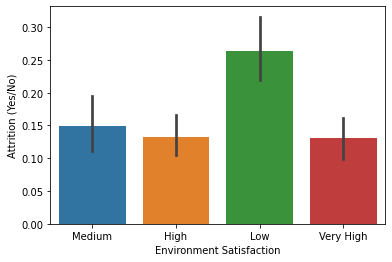

In [ ]:
sns.barplot(data=data,x="Environment Satisfaction",y="Attrition (Yes/No)")

It is clear that employees with low environment satisfaction have maximum attrition

<AxesSubplot:xlabel='Business Travel', ylabel='Attrition (Yes/No)'>

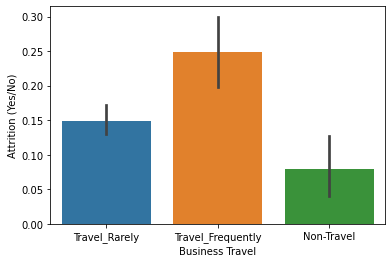

In [ ]:
sns.barplot(data=data,x="Business Travel",y="Attrition (Yes/No)")

Employees who donot travel frequently have beeen reatained 

where as those who travel a lot have also attrited the most

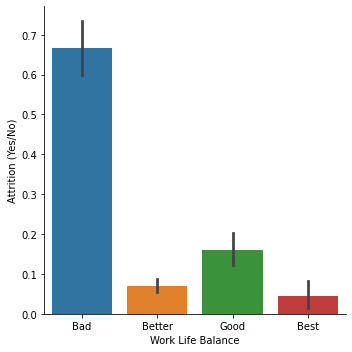

In [ ]:
sns.catplot(data=data,x="Work Life Balance",y="Attrition (Yes/No)",kind="bar")

Employees with bad Work Life Balance tend to quit as compared to all other employees.

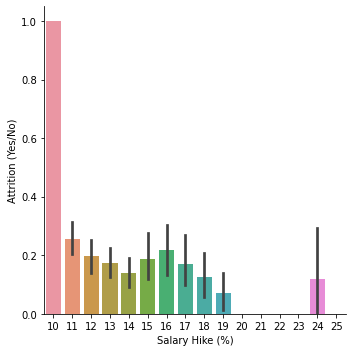

In [ ]:
sns.catplot(data=data,x="Salary Hike (%)",y="Attrition (Yes/No)",kind="bar")

Low salary hike is a reason for attrition

<AxesSubplot:xlabel='Job Level', ylabel='Attrition (Yes/No)'>

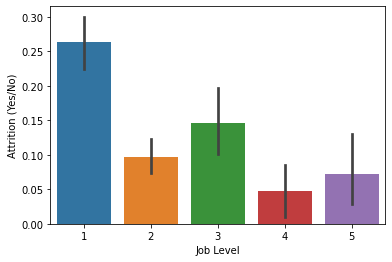

In [ ]:
sns.barplot(data=data,x="Job Level",y="Attrition (Yes/No)")

Employees with lower job level have attrited more where as those with higher levels have retained

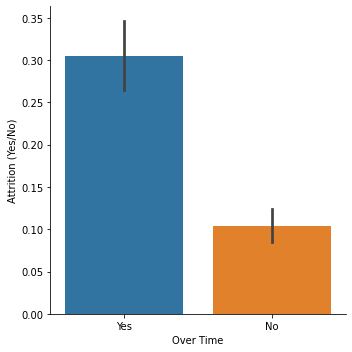

In [ ]:
sns.catplot(data=data,x="Over Time",y="Attrition (Yes/No)",kind="bar")

We can see much higher attrition in mployees who worked over time

In [ ]:
corr = data.corr()

<AxesSubplot:>

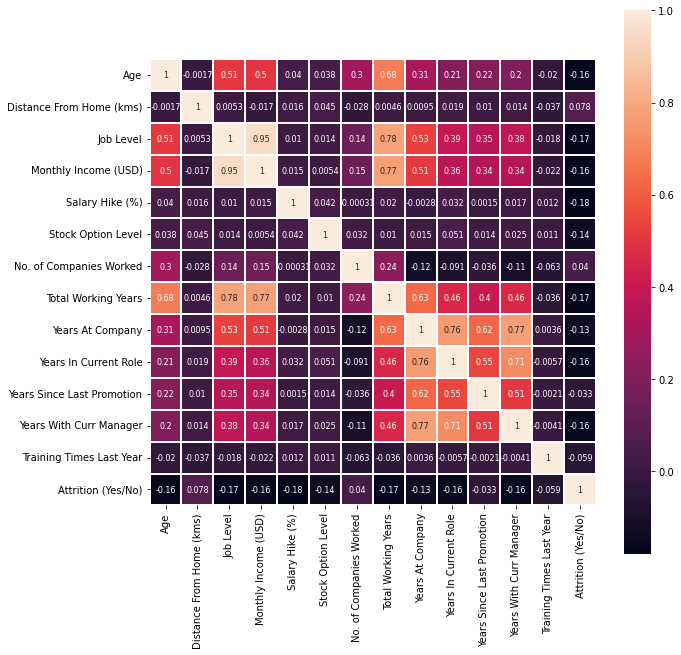

In [ ]:
fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(ax=axis, data = corr, 
            square=True, linewidth=0.1,annot=True, annot_kws={"fontsize":8})

There is little to no correlation among the columns except

Job Level and Monthly Income, which is simply because 

employee with higher job level will have a higher salary 

## **5. Pre-processing (Label Encoding)**

In [ ]:
# getting all object type columns
object_cols = data.select_dtypes(include='object').columns
# label encoding all object type coumns
for col in object_cols:
    data[col] = le.fit_transform(data[col])

## **6. Dropping unnecessary features**

In [ ]:
data.drop(['Marital Status','Training Times Last Year','Age'],axis=1,inplace=True)

## **7. Train Test Split**

In [ ]:
# X => all columns except Attrition (Yes/No), which is to be predicted
X = data.drop("Attrition (Yes/No)", axis=1)

# y => Attrition (Yes/No) 
y = data["Attrition (Yes/No)"]

In [ ]:
print(X.shape)
print(y.shape)

(1470, 23)
(1470,)


In [ ]:
X.head(5)

,Department,Job Role,Gender,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Level,Job Satisfaction,...,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Work Life Balance,Relationship Satisfaction
0,2,7,0,2,1,2,1,0,2,3,...,1,2,8,6,4,0,5,2,0,1
1,1,6,1,1,1,1,8,2,2,2,...,0,1,10,10,7,1,7,0,2,3
2,1,2,1,2,4,2,2,2,1,0,...,1,6,7,0,0,0,0,1,0,2
3,1,6,0,4,1,1,3,0,1,0,...,1,1,8,8,7,3,0,3,2,0
4,1,2,1,1,3,2,2,0,1,2,...,0,9,6,2,2,2,2,1,2,3


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition (Yes/No), Length: 1470, dtype: int32

In [ ]:
# 70% data is train set, 30% is test set
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## **8. Making the model**

In [ ]:
def  prediction_and_accuracy(model, X_train, X_test, y_train, y_test, txt):
    y_pred_train = model.predict(X_train)
    y_pred_test= model.predict(X_test)
    train_acc = round( accuracy_score(y_train, y_pred_train)*100 , 2)
    test_acc = round( accuracy_score(y_test, y_pred_test)*100 , 2)
    print(txt)
    print(f"|__Training Accuracy = {train_acc}%")
    print(f"|__Testing Accuracy = {test_acc}%")

### *Decision Tree Classification (using Gini Index)*

In [ ]:
d = 10
dt = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
prediction_and_accuracy(dt, X_train, X_test, y_train, y_test,
                            f"Performance of Decision Tree Classifier (depth: {d}):")

Performance of Decision Tree Classifier (depth: 10):
|__Training Accuracy = 98.35%
|__Testing Accuracy = 86.85%


### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)
prediction_and_accuracy(lr, X_train, X_test, y_train, y_test,
                        "Performance of Logistic Regression:")

Performance of Logistic Regression:
|__Training Accuracy = 88.44%
|__Testing Accuracy = 87.98%


### Random Forest

In [ ]:
# As Gini was used in DT classifier
# let us use Entropy as the criterion here
rf = RandomForestClassifier(n_estimators = 15, 
                            criterion="entropy").fit(X_train, y_train)
prediction_and_accuracy(rf, X_train, X_test, y_train, y_test,
                        "Performance of Random Forest Classfifier:")

Performance of Random Forest Classfifier:
|__Training Accuracy = 99.9%
|__Testing Accuracy = 89.34%


### SVM

In [ ]:
# Linear
lin = SVC(kernel="linear", C = 100).fit(X_train, y_train)
prediction_and_accuracy(lin, X_train, X_test, y_train, y_test,
                        "Performance of SVM (kernel: Lnear):")

Performance of SVM (kernel: Lnear):
|__Training Accuracy = 88.44%
|__Testing Accuracy = 87.07%


In [ ]:
# polynomial kernel
poly = SVC(kernel="poly", degree = 3, C = 100).fit(X_train, y_train)
prediction_and_accuracy(poly, X_train, X_test, y_train, y_test,
                        "Performance of SVM (kernel: polynomial, deg: 3):")

Performance of SVM (kernel: polynomial, deg: 3):
|__Training Accuracy = 83.77%
|__Testing Accuracy = 84.13%


In [ ]:
# rbf kernel
rbf = SVC(kernel = "rbf", gamma = 0.5, C = 100).fit(X_train, y_train)
prediction_and_accuracy(rbf, X_train, X_test, y_train, y_test,
                        "Performance of SVM (kernel: RBF):")

Performance of SVM (kernel: RBF):
|__Training Accuracy = 100.0%
|__Testing Accuracy = 84.13%


### **K-Means**

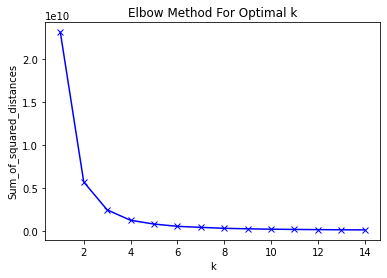

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

#VISUALIZING PLOT
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that the elbow is formed at k = 2, hence we will create two clusters

(representing two classes in attrition: yes and no) 

In [ ]:
kmeans = KMeans(n_clusters=2, init='random', n_init=50, max_iter=500, 
                verbose=0, random_state=50, copy_x=False, algorithm='auto')
y_kmeans=kmeans.fit_predict(X_train)

In [ ]:
X2= X_train.values

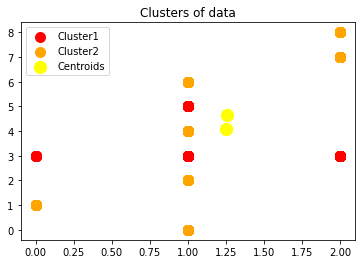

In [ ]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='orange',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='yellow',label='Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()

We cannot cluster this dataset well using K-Means clustering

## **9. Summary of all the models**

<style>
    table{
        background-color:black;
        padding: 5px;
    }
</style>

<table>
<tr style="border:2px solid gray;">
    <th>Models</th>
    <th>Training Accuracy</th>
    <th>Testing Accuracy</th>
</tr>
<tr style="border:2px solid #179100">
    <td >Random Forest Classifier</td>
    <td >99.9 %</td>
    <td >89.34 %</td>
</tr>
    
<tr style="border:2px solid #22cc02">
    <td>Decision Tree Classifier</td>
    <td>98.35 %</td>
    <td>86.85 %</td>
</tr>

<tr style="border:2px solid #71cc02">
    <td>SVM (RBF kernel)</td>
    <td>100.0 % </td>
    <td>84.13 % </td>
</tr>

<tr style="border:2px solid rgb(252, 158, 158)">
    <td>Logistic Regression</td>
    <td>88.44 %</td>
    <td>87.98 %</td>
</tr>

<tr style="border:2px solid rgb(255, 121, 121)">
    <td>SVM (linear kernel)</td>
    <td>88.44 %</td>
    <td>87.07 %</td>
</tr> 

<tr style="border:2px solid rgb(252, 91, 91)">
    <td>SVM (poly kernel)</td>
    <td>83.77 %</td>
    <td>84.13 %</td>
</tr>
</table>

<h5>
    <p>SVM (RBF) gives 100% training accuracy while</p>
    <p>Random Forset gives best testing accuracy</p>
    <p>Random Forest Classifier performs the best because </p>
    <ul>
    <li>it creates multiple trees and gives us an aggrigate result </li>
    <li>removing the bias in a single model</li>
    </ul>
</h5>